In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
# Make the plots a bit bigger to see
# NOTE: Must be done in a separate cell
plt.rcParams['figure.dpi'] = 100

In [3]:
# path1 = "Data_ccr/par_set_2_psd/trun3_d2/"
# path1 = "../NoneqTrans2/Data_test/trun0_d1_40/"
path1 = "../NoneqTrans2/Data_test/par_set1/trun1_d1/"
# path1 = "Data_ccr/par_set_2_psd/vrun3_d1_40/"
# path1 = "../../../../../../Volumes/Kunal_EHD/Work/Codes/RS_data_122920/par_set_2_cbc/80x80/trun2_d1/"
# path2 = "../NoneqTrans2/Data_test/trun2_d1/"
# Python Data Single run
A1 = np.loadtxt(path1 + "delta_f2py_test.dat")
nn = np.size(A1,0)
print(np.shape(A1))

#### Python Data Voltage Up
# E_up = A1[:,0]
T_up = A1[:,0]
delta_up = A1[:,1]
I_up = A1[:,6]
Vs_up = A1[:,4]
R_up = A1[:,7]
# dR_up = A1[:,9]
mx = 64
my = 64

inputs = open(path1+"input_par.dat", "r")
Nsamp = 128
maxdist = mx//2
print(inputs.read())

(100, 11)
{'mx': 64, 'my': 64, 'nwarm': 400000, 'nskip': 16, 'Tc': 1.0, 'coef': 0.1, 'dphi': 0.2, 'gamma': 0.1, 'r0': 3.5, 'g2': 1.0, 'g4': -1.0, 'g6': 0.5, 'Rload': 1.0, 'mfphi': False, 'tloop': True}{'Tcrit': 0.56, 'dE': 0.1, 'minE': 0.1, 'maxE': 10.1, 'dTb': 0.02, 'minT': 0.02, 'maxT': 2.02, 'nmeas': 2048, 'Tbath': 0.9, 'seed': 45823121, 'NPEs': 1, 'iphi': True}


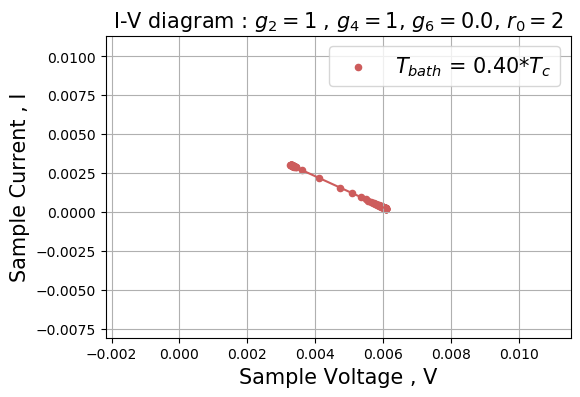

In [4]:
plt.scatter(Vs_up, I_up, s = 20.0, c = 'IndianRed', label='$T_{bath}$ = 0.40*$T_c$' , marker = 'o')
plt.plot(Vs_up, I_up,  c = 'IndianRed')


# plt.plot(Data_Set[:,0],Data_Set[:,1])
plt.legend(fontsize = 15)
plt.title('I-V diagram : $g_2 = 1$ , $g_4 = 1$, $g_6 = 0.0$, $r_0 = 2.$' , fontsize = 15)
# plt.title('I-V diagram , $n_{skip}$=32, $E$ = 0.1')
plt.xlabel('Sample Voltage , V', fontsize = 15 )
plt.ylabel('Sample Current , I', fontsize = 15 )
# plt.xlim(14.0,22.)
plt.grid(b=True,which='major', axis='both')
# plt.savefig("I-V_comparison.pdf")

plt.show()

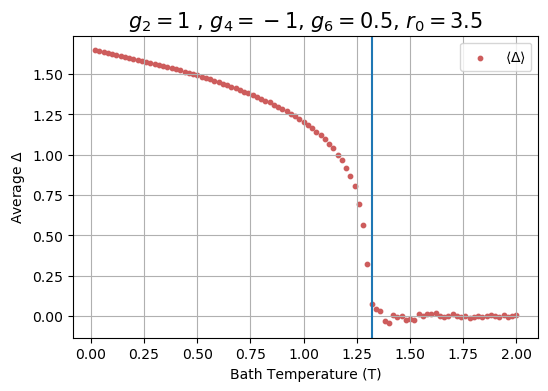

In [5]:
# plt.scatter(E_up*63.0,R_up, s=10.0,c="IndianRed",label="$T_{bath}$ = 0.4*$T_c$")
plt.ylabel('Resistance (R)')
plt.xlabel('Applied Field (E)')

plt.scatter(T_up,delta_up, s=10.0,c="IndianRed", label = r'$\langle \Delta \rangle$')
plt.ylabel( 'Average $\Delta$')
plt.xlabel('Bath Temperature (T)')

# plt.xlim(18.,30.)
plt.axvline(x = 1.32)
# plt.title('$g_2 = 1$ , $g_4 = 1$, $g_6 = 0.0$, $r_0 = 2.$' , fontsize = 15)
plt.title('$g_2 = 1$ , $g_4 = -1$, $g_6 = 0.5$, $r_0 = 3.5$' , fontsize = 15)
plt.grid(b=True,which='major', axis='both')
plt.legend()

# plt.savefig(path1 + "Delta_v_T.pdf")
plt.show()

## Distribution Plots

In [6]:
#### Voltage Domain plots

mxphi = []
mnphi = []

mxdphi = []
mndphi = []
for i in range(nn):
    phi = np.loadtxt(path1 + "phi_val_"+ format(T_up[i], '.2f')+ "_"+ str(Nsamp-1)+ "_.dat")
    dphi = phi - np.mean(phi)
    mxphi.append(np.max(phi))
    mnphi.append(np.min(phi))
    mxdphi.append(np.max(dphi))
    mndphi.append(np.min(dphi))


maxphi = np.max(mxphi)
minphi = np.min(mnphi)
maxdphi = np.max(mxdphi)
mindphi = np.min(mndphi)
print( minphi, maxphi)
print(mindphi, maxdphi)

-1.957701521680171 2.2127209468711344
-2.2786914746253317 1.987181714598117


In [7]:
#### Voltage Domain plots
rows = 10
columns = 10
fig, axes = plt.subplots(figsize=(columns*10+15, rows*10+15 ))
# E = 0.02
# width1 = np.zeros(rows*columns)
for i in range(rows*columns):
#     if i%16 == 0:    
#     globals()["phi_" + str(i)] = np.loadtxt(path1 + "phi_val_"+ format(T_up[i], '.2f')+".dat")
    globals()["phi_" + str(i)] = np.loadtxt(path1 + "phi_val_"+ format(T_up[i], '.2f')+ "_"+ str(Nsamp-1)+ "_.dat")
    fig.add_subplot(rows, columns, (i+1))
    phi2 = (globals()["phi_" + str(i)])**2
#     dphi2 = phi2 - np.mean(phi2)
    dist = plt.imshow(np.transpose((globals()["phi_" + str(i)])),cmap='plasma',origin='lower', vmin = minphi, vmax = maxphi)
    plt.title("$T_B$  = "+format(T_up[i], '.2f') , fontsize = 80)
#     E += 0.02
    plt.xlabel("m_x")
    plt.ylabel("m_y")
# plt.legend()
# plt.title('$N_{meas}$=8192, $g_2 = 1$ , $g_4 = 1$, $g_6 = 0.0$, $r_0 = 2.0$')
# plt.savefig(path1 + "Dist_phi_Temp_dc.pdf",bbox_inches='tight')
# print(width)
plt.show()





In [8]:
#### Voltage Domain plots
# rows = 10
rows = 10
columns = 10
fig = plt.figure(figsize=(columns*10+15, rows*10+15 ))
E = 4.0
width1 = np.zeros(rows*columns)
for i in range(rows*columns):
#     if i%16 == 0:    
#     globals()["phi_" + str(i)] = np.loadtxt(path1 + "phi_val_"+ format(E_up[i], '.2f')+".dat")
    globals()["phi_" + str(i)] = np.loadtxt(path1 + "phi_val_"+ format(T_up[i], '.2f')+ "_"+ str(Nsamp-1)+ "_.dat")
    fig.add_subplot(rows, columns, (i+1))
    phi = (globals()["phi_" + str(i)])
    dphi = phi - np.mean(phi)
#     plt.imshow(np.transpose(phi2),cmap='rainbow')
    plt.imshow(np.transpose(dphi),extent=[0, mx, 0, my],cmap='plasma',origin='lower', vmin = mindphi, vmax = maxdphi)
#     x, y = np.meshgrid(np.arange(mx), np.arange(my))
#     plt.contourf(np.transpose(phi2))
#     plt.colorbar();
    plt.title("Vt = "+format(T_up[i], '.2f') , fontsize = 80)
    E += 0.1
    plt.xlabel("m_x")
    plt.ylabel("m_y")
# plt.legend()


# plt.title('$N_{meas}$=8192, $g_2 = 1$ , $g_4 = 1$, $g_6 = 0.0$, $r_0 = 2.0$')
# plt.savefig(path1 + "Dist_dphi_Temp_dc.pdf",bbox_inches='tight')
# print(width)
plt.show()







In [9]:
# phi = np.loadtxt(path1 + "phi_val_6.00.dat")
# dphi2 = phi**2 - np.mean(phi**2)
# # print(phi, dphi2)
# # gy = np.array((mx,my))
# a = 4
# gy = np.zeros(my)
# for j in range(my):
#     gg = 0
#     for i in range(mx):
#         gg += dphi2[(i+a)%mx,j]*dphi2[i,j]
#     gy[j] = gg/mx

    
    
# # print(gy) 


# plt.plot(gy)
# plt.xlabel("y")
# plt.title("Correlations along X")
# plt.show()

# # plt.imshow(np.transpose(dphi2),cmap='rainbow')

In [10]:
# phi = np.loadtxt(path1 + "phi_val_6.00.dat")
# dphi2 = phi**2 - np.mean(phi**2)
# # print(phi, dphi2)
# # gy = np.array((mx,my))
# a = 4
# gx = np.zeros(my)
# for i in range(my):
#     gg = 0
#     for j in range(mx):
#         if j > 0 and j < my-a:
#             gg += dphi2[i,(j+a)]*dphi2[i,j]
#     gx[i] = gg/(my-a)

    
    
# # print(gx) 

# plt.plot(gx)
# plt.xlabel("x")
# plt.title("Correlations along Y")
# plt.show()
# # plt.imshow(np.transpose(dphi2),cmap='rainbow')

In [11]:
# plt.plot(gx, label = "pair correlation along X")
# plt.plot(gy, label = "pair correaltion along Y")
# plt.legend()
# plt.show()

In [12]:
#### Corelations along Y ####
def pair_corY(phi,a):
    nx,ny = np.shape(phi)
    gx = np.zeros(nx)
    for i in range(nx):
        gg = 0
        for j in range(ny):
            if j < (ny-a):
                gg += phi[i,(j+a)]*phi[i,j]
        gx[i] = gg/(ny-a)
    return np.mean(gx)
    

#### Correlations along X ####
def pair_corX(phi,a):
    nx,ny = np.shape(phi)
    gy = np.zeros(ny)
    for j in range(ny):
        gg = 0
        for i in range(nx):
            if i < (nx-a):
                gg += phi[(i+a),j]*phi[i,j]
        gy[j] = gg/(nx-a)
#             gg += phi[(i+a)%mx,j]*phi[i,j]
#         gy[j] = gg/mx
    return np.mean(gy)




In [13]:
# phi = np.loadtxt(path1 + "phi_val_0.44.dat")
# dphi = phi - np.mean(phi)

# # ff = pair_corX(dphi,2)
# # print(ff)
# # a = 0
# gofrx = []
# gofry = []

# for i in range(mx-1):
#     gg = pair_corX(dphi,i)
#     gofrx.append(gg)
    

# for j in range(my-1):
#     gg = pair_corY(dphi,j)
#     gofry.append(gg)
    
    
# plt.plot(gofrx, label = " pair correlation along X")
# plt.plot(gofry, label = " pair correlation along Y")
# plt.axhline(y = 0.0)
# plt.ylabel("g(r)")
# plt.xlabel("r")
# plt.title("Electric field along Y")
# plt.legend()
# plt.show()

In [14]:
# #### Voltage Domain plots
# # nn = 26
# Tb = []
# tb = 0.04
# a = 4
# # maxdist = 63
# # width1 = np.zeros(rows*columns)
# Gx = np.zeros((nn,maxdist))
# Gy = np.zeros((nn,maxdist))
# for k in range(nn):
# #     phi = np.loadtxt(path1 + "phi_val_"+ format(tb, '.2f')+".dat")
#     phi = np.loadtxt(path1 + "phi_val_"+ format(T_up[k], '.2f')+ "_"+ str(Nsamp-1)+ "_.dat")
#     dphi = phi - np.mean(phi)
#     gofrx = []
#     gofry = []
#     for dist in range(maxdist):
#         gg = pair_corX(dphi,dist)
#         gofrx.append(gg)
#     for dist in range(maxdist):
#         gg = pair_corY(dphi,dist)
#         gofry.append(gg)
#     Gx[k,:] = gofrx[:]
#     Gy[k,:] = gofry[:]
#     tb += 0.02
# #     Tb.append(tb)
#     Tb.append(T_up[k])
# #     plt.xlabel("m_x")
# #     plt.ylabel("m_y")
# # plt.legend()
# # plt.title('$N_{meas}$=1024, $g_2 = 1$ , $g_4 = -1$, $g_6 = 0.5$, $r_0 = 3.5$')
# # plt.savefig(path4 + "Dist_phi2_Tbath=0.6*Tc.pdf")
# # print(width)
# # plt.show()




# Gx = np.array(Gx)
# Gy = np.array(Gy)
# Tb = np.array(Tb)
# print(np.shape(Gx), np.shape(Gy)) 
# # Gx = np.abs(Gx)
# # Gy = np.abs(Gy)

In [15]:
# for i in range(nn):
#     plt.plot(Gx[i,:], label = "$T_B$ = "+ format(Tb[i],'.2f') )
    
# # plt.axhline(y = 0.0)
# # plt.axvline(x = 0.0)
# plt.ylabel("g(r)")
# plt.xlabel("r")
# # plt.xlim(-1,30)
# plt.title("Pair correlation along X (perpendicular to field)")
# plt.grid(b=True,which='major', axis='both')
# plt.legend(title=r'Bath Temperature ($T_B$)', bbox_to_anchor=(1.01, 1), loc='upper left')

# plt.show()

In [16]:
# for i in range(nn):
#     plt.plot(Gy[i,:], label = "$T_B$ = "+ format(Tb[i],'.2f') )
    
# # plt.axhline(y = 0.0)
# # plt.axvline(x = 0.0)
# plt.ylabel("g(r)")
# plt.xlabel("r")
# # plt.xlim(-1.,30)
# plt.title("Pair correlation along Y (parallel to field)")
# plt.grid(b=True,which='major', axis='both')
# plt.legend(title=r'Bath Temperature ($T_B$)', bbox_to_anchor=(1.01, 1), loc='upper left')
# plt.show()



In [17]:
# x_Ax = np.arange(mx-1)
# for i in range(nn):
#     plt.scatter(x_Ax,Gx[i,:])
#     plt.scatter(x_Ax,Gy[i,:])
#     plt.plot(Gx[i,:], label = "Pair correlation along X (perpendicular to field)" )
#     plt.plot(Gy[i,:], label = "Pair correlation along Y (parallel to field)" )
#     plt.ylabel("g(r)")
#     plt.xlabel("r") 
#     # plt.xlim(-1.,30)
#     plt.title("$T_B$ = "+ format(Tb[i],'.2f'))
#     plt.grid(b=True,which='major', axis='both')
#     plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
# #     plt.savefig(path2 + "gofr_tb1_"+format(Tb[i],'.2f')+"_cbc.pdf",bbox_inches='tight')
#     plt.show()

In [18]:
# phi = np.loadtxt(path1 + "phi_val_0.44.dat")
# dphi = phi - np.mean(phi)
# N = [10, 15, 20, 25, 30]
# Nsamp = 100

# for n in N:    
#     Gx_ = np.zeros((Nsamp,n))
#     Gy_ = np.zeros((Nsamp,n))

#     for l in range(Nsamp):
#         i = np.random.randint(0,mx)
#         j = np.random.randint(0,my)
#         dphi1 = dphi[i:i+n,j:j+n]
#         gofrx = []
#         gofry = []
#         dist = 0
#         for dist in range(n):
#             gg = pair_corX(dphi,dist)
#             gofrx.append(gg)
#         dist = 0    
#         for dist in range(n):
#             gg = pair_corY(dphi,dist)
#             gofry.append(gg)
#         Gx_[l,:] = gofrx[:]
#         Gy_[l,:] = gofry[:]
    
#     x_ax = np.arange(0,n)
#     G_x = np.mean(Gx_,axis = 0)
#     G_y = np.mean(Gy_,axis = 0)
#     plt.scatter(x_ax,G_x, label = " Perpendicular to the field")
#     plt.scatter(x_ax,G_y, label = " Parallel to field")
#     plt.ylabel("g(r)")
#     plt.xlabel("r")
#     plt.title("N = "+ str(n))
#     plt.grid(b=True,which='major', axis='both')
#     plt.legend()
#     plt.show()
    

In [19]:
# phi = np.loadtxt(path1 + "phi_val_6.20.dat")
# phi = np.loadtxt(path1 + "phi_val_6.40_255_.dat")
dphi = phi - np.mean(phi)
# maxdist = 79
# N = [10, 15, 20, 25, 30]
Gx_fft = np.zeros((nn,maxdist))
Gy_fft = np.zeros((nn,maxdist))
Gx_full = np.zeros((nn,maxdist*Nsamp))
Gy_full = np.zeros((nn,maxdist*Nsamp))
G_x = np.zeros((nn,maxdist))
G_y = np.zeros((nn,maxdist))
k = 0 
for T in T_up:    
    Gx_ = np.zeros((Nsamp,maxdist))
    Gy_ = np.zeros((Nsamp,maxdist))
    
    gxfft = np.zeros((Nsamp,maxdist))
    gyfft = np.zeros((Nsamp,maxdist))
    for l in range(Nsamp):
#         i = np.random.randint(0,mx)
#         j = np.random.randint(0,my)
#         dphi1 = dphi[i:i+n,j:j+n]
        phi = np.loadtxt(path1 + "phi_val_"+ format(T, '.2f')+ "_"+ str(l)+ "_.dat")
        dphi = phi - np.mean(phi)
        gofrx = []
        gofry = []
        dist = 0
        for dist in range(maxdist):
            gg = pair_corX(dphi,dist)
            gofrx.append(gg)
        dist = 0    
        for dist in range(maxdist):
            gg = pair_corY(dphi,dist)
            gofry.append(gg)
        Gx_[l,:] = gofrx[:]
        Gy_[l,:] = gofry[:]
        gxfft[l,:] = np.abs(np.fft.fft(gofrx[:]))
        gyfft[l,:] = np.abs(np.fft.fft(gofry[:]))

    Gx_full[k,:] = Gx_.flatten('F')
    Gy_full[k,:] = Gy_.flatten('F')        
    x_ax = np.arange(0,maxdist)
    G_x[k,:] = np.mean(Gx_,axis = 0)
    G_y[k,:] = np.mean(Gy_,axis = 0)
    
    Gx_fft[k,:] = np.mean(gxfft,axis=0)
    Gy_fft[k,:] = np.mean(gyfft,axis=0)
    k +=1
#     plt.plot(x_ax,G_x[k,:], label = " Perpendicular to the field")
#     plt.plot(x_ax,G_y[k,:], label = " Parallel to field")
    
#     plt.ylabel("g(r)")
#     plt.xlabel("r")
#     plt.title("E = "+ format(E*80.,'.2f'))
#     plt.grid(b=True,which='major', axis='both')
#     plt.legend()
# #     plt.savefig(path1 + "corr_n_"+str(n)+"_.pdf")
#     plt.savefig(path2 + "gofr_Vt_"+format(E*my,'.2f')+"_cbc.pdf",bbox_inches='tight')
# #     plt.show()

np.savetxt(path1 + 'gofr_x.dat', G_x)
np.savetxt(path1 + 'gofr_y.dat', G_y)
np.savetxt(path1 + 'gofr_x_full.dat', Gx_full)
np.savetxt(path1 + 'gofr_y_full.dat', Gy_full)

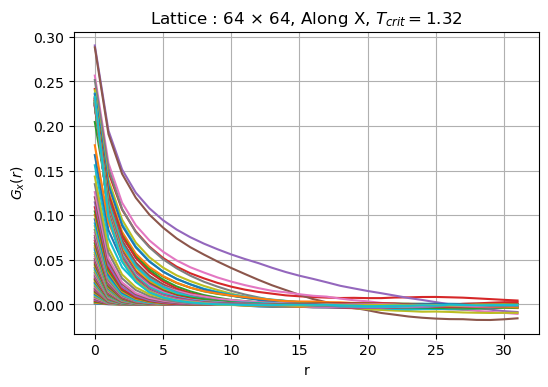

In [20]:
for k in range(0,nn):
    plt.plot(x_ax,G_x[k,:],label = "T = " + format(T_up[k]*(mx), '.2f') )

plt.title(r'Lattice : 64 $\times$ 64, Along X, $T_{crit} = 1.32$')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid(b=True,which='major', axis='both')
plt.ylabel('$G_x(r)$')
plt.xlabel('r')

# plt.savefig(path1 + "gofrx_temp_full.pdf",bbox_inches='tight')
plt.show()    

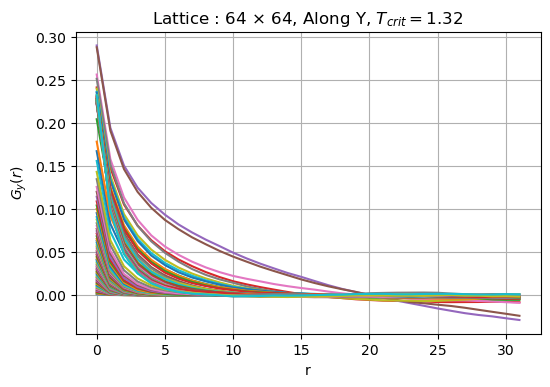

In [21]:
for k in range(0,nn):
    plt.plot(x_ax,G_y[k,:],label = "T = " + format(T_up[k]*(my), '.2f') )

plt.title(r'Lattice : 64 $\times$ 64, Along Y, $T_{crit} = 1.32$')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid(b=True,which='major', axis='both')
plt.ylabel('$G_y(r)$')
plt.xlabel('r')  
# plt.savefig(path1 + "gofry_temp_full.pdf",bbox_inches='tight')
plt.show()    

Text(0.5, 0, 'r')

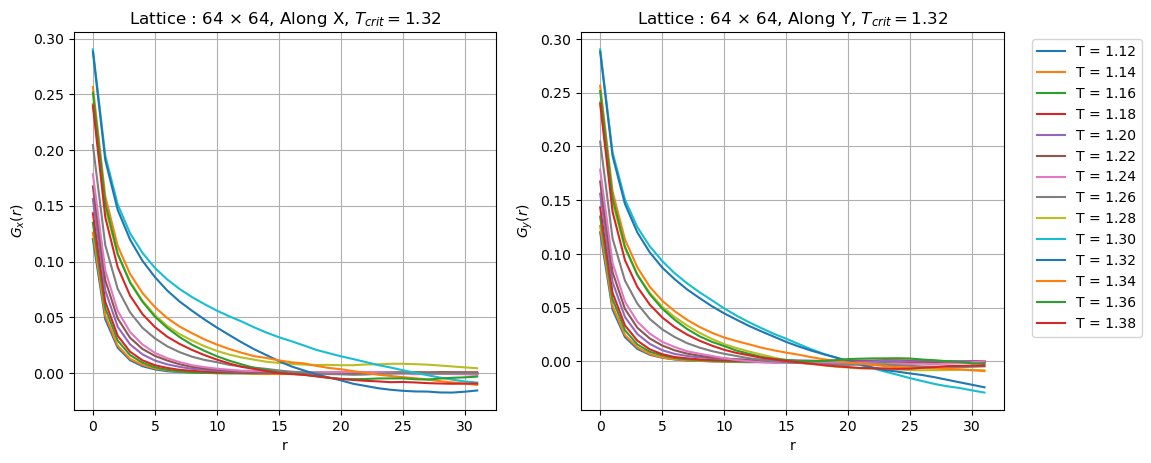

In [22]:
f = plt.figure(figsize=(12, 5)); # plot the calculated values    


sp =  f.add_subplot(1, 2, 1 );
for k in range(0,nn):
    if T_up[k] > 1.1 and T_up[k] < 1.4:
        plt.plot(x_ax,G_x[k,:],label = "T = " + format(T_up[k], '.2f') )

plt.title(r'Lattice : 64 $\times$ 64, Along X, $T_{crit} = 1.32$')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid(b=True,which='major', axis='both')
plt.ylabel('$G_x(r)$')
plt.xlabel('r')

# plt.savefig(path1 + "gofrx_85%_full.pdf",bbox_inches='tight')
# plt.show()  
   
# plt.show()    


sp =  f.add_subplot(1, 2, 2 );
for k in range(0,nn):
    if T_up[k] > 1.1 and T_up[k] < 1.4:
        plt.plot(x_ax,G_y[k,:],label = "T = " + format(T_up[k], '.2f') )

plt.title(r'Lattice : 64 $\times$ 64, Along Y, $T_{crit} = 1.32$')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.grid(b=True,which='major', axis='both')
plt.ylabel('$G_y(r)$')
plt.xlabel('r')  
# plt.savefig(path1 + "gofry_85%_full.pdf",bbox_inches='tight')
# plt.show()    


# plt.savefig(path1 + "gofr_temp_dc.pdf",bbox_inches='tight')

In [23]:
# print(np.shape(Gx_fft),np.shape(Gx_fft))
# klabels = np.fft.fftfreq(mx-1, d=1)
# klabels = np.fft.fftshift(klabels)
# Gx_fft = np.fft.fftshift(Gx_fft,axes=1)
# Gy_fft = np.fft.fftshift(Gy_fft,axes=1)
# # print(klabels)

In [24]:

# k = 0
# for T in T_up:
#     plt.plot(klabels,Gx_fft[k,:], label = " Perpendicular to the field")
#     plt.plot(klabels,Gy_fft[k,:], label = " Parallel to field")
#     k += 1
#     plt.ylabel("g(k)")
#     plt.xlabel("k")
#     plt.title("T = "+ format(T,'.2f'))
#     plt.grid(b=True,which='major', axis='both')
#     plt.legend()
# #     plt.savefig(path1 + "corr_n_"+str(n)+"_.pdf")
# #     plt.savefig(path1 + "gofr_fft_"+format(T,'.2f')+"_cbc.pdf",bbox_inches='tight')
#     plt.show()